# Under the influence of connectives: How connective location and clause order affect retention of text

# Background

Causal connectives (e.g., because) provide information about the type of relationship that exists between two sentences. However, readers can still infer relationships between clauses without connectives even though such sentences are considered less cohesive and lead to greater processing difficulty (Black & Bern, 1981; Irwin, 1980). In fact, McNamara et al. (1996) suggested that readers may benefit from less coherent text precisely because the reader must spend additional resources generating the inference on their own. However, this is dependent upon the readers’ ability to make the inference the author intended. We investigated a potential trade-off whereby less cohesive sentences may promote memory for details but at the expense of generating accurate inferences about their relationship. Participants read short expository passages while their eye-movements were tracked. Within the passages, we varied the inclusion of a connective, the order of the clauses (cause-effect versus effect-cause), and the location of the connective (e.g. Because can occur at the beginning or in the middle of a sentence). After reading all of the passages, participants took a memory test asking them to select a correct causal inference and a correct detail for each passage. The results from such manipulations will add to an understanding of how processing difficulty interacts with inference generation, comprehension, and memory.

# Method

Participants read 120 passage, 60 critical divided equally across conditions. Reading the passages took approximately 45 minutes. They then answered 60 inference questions about the passages followed by 60 detail questions. 
Passages were as follows:
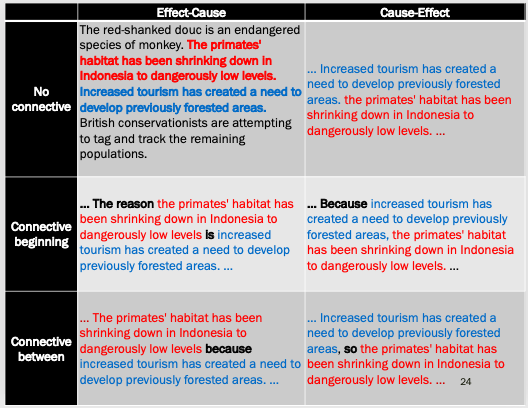
<br><br>
<center><b>Inference Question:</b></center>
<b>Based on the passage about the red-shanked douc, it is most reasonable to conclude …</b><br>
- The red-shanked douc have been forced out of their habitat due to increased tourism.<br>
- Tourism is increasing in some areas as people travel to see the red-shanked douc before it goes extinct.
<br><br>
<center><b>Detail Question:</b></center>
<b>Where is tourism on the rise?</b><br>
- Indonesia<br>
- Cambodia

### Expected Results based on past work

cond1,cond2,mean
Connective Absent-Hard,Cause-Effect order-Easy,0.5666667
Connective Absent-Hard,Effect-Cause order-Hard,0.3000000
Connective Present-Easy,Cause-Effect order-Easy,0.3000000
Connective Present-Easy,Effect-Cause order-Hard,0.5666667


cond1,cond2,mean
Connective Absent-Hard,Cause-Effect order-Easy,0.7000000
Connective Absent-Hard,Effect-Cause order-Hard,0.7000000
Connective Present-Easy,Cause-Effect order-Easy,0.2666667
Connective Present-Easy,Effect-Cause order-Hard,0.2666667


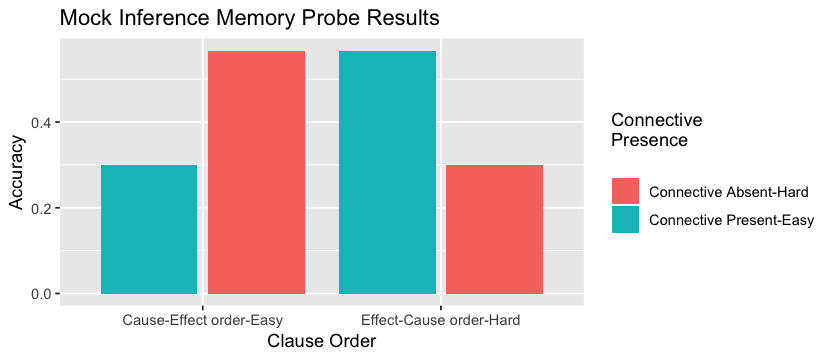

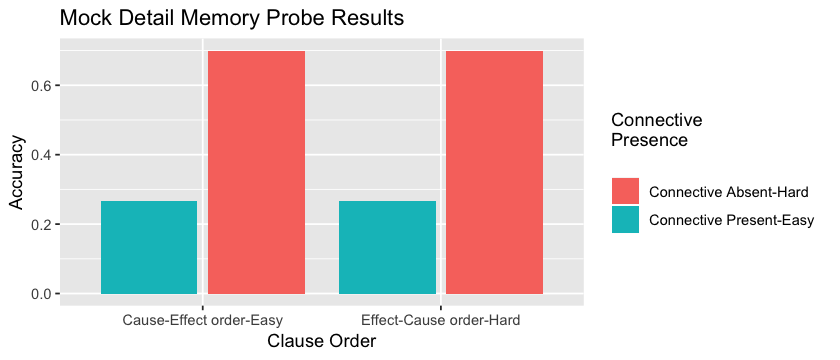

In [40]:
#Creating fake data to model expected inference results
options(repr.plot.width=7, repr.plot.height=3)
set.seed(2)
fake.items <- as.data.frame(c(1:60))
colnames(fake.items) <- "QuestNum"
fake.participants <- as.data.frame(c(1:84))
colnames(fake.participants) <- "ID"
fake.df <- merge(fake.participants,fake.items)
fake.df$cond1 <- as.factor(ifelse(fake.df$QuestNum<=30,"Connective Absent-Hard","Connective Present-Easy"))
fake.df$cond2 <- as.factor(ifelse(fake.df$QuestNum<=15,"Cause-Effect order-Easy",
                                  ifelse(fake.df$QuestNum>15&fake.df$QuestNum<=30,"Effect-Cause order-Hard",
                                         ifelse(fake.df$QuestNum>30&fake.df$QuestNum<=45,"Cause-Effect order-Easy",
                                                "Effect-Cause order-Hard"))))

fake.df$cond3 <- as.factor(paste(fake.df$cond1,fake.df$cond2))
fake.df$Acc <- as.factor(ifelse(fake.df$cond3%in%c("Connective Present-Easy Cause-Effect order-Easy","Connective Absent-Hard Effect-Cause order-Hard"),
                                sample(x = c("0","1"), prob=c(.7,.3), size  = 30,replace=TRUE),
                                sample(x = c("0","1"), prob=c(.3,.7), size  = 30,replace=TRUE)))
library(dplyr)
fake.df$Acc.Num <- as.numeric(ifelse(fake.df$Acc==0,0,1))
means <- fake.df %>% group_by(cond1,cond2) %>% summarise(mean = mean(Acc.Num))
means
library(ggplot2)
ggplot(means,aes(cond2,mean,fill=cond1))+geom_bar(stat="identity",position=position_dodge2(reverse=TRUE))+
  labs(title="Mock Inference Memory Probe Results",x="Clause Order", y="Accuracy",
       fill="Connective\nPresence\n")


#Creating fake data to model expected detail results
fake.df$DAcc <- as.factor(ifelse(fake.df$cond1=="Connective Present-Easy",
                          sample(x = c("0","1"), prob=c(.7,.3), size  = 30,replace=TRUE),
                          sample(x = c("0","1"), prob=c(.3,.7), size  = 30,replace=TRUE)))
fake.df$DAcc.Num <- as.numeric(ifelse(fake.df$DAcc==0,0,1))
means <- fake.df %>% group_by(cond1,cond2) %>% summarise(mean = mean(DAcc.Num))
means
library(ggplot2)
ggplot(means,aes(cond2,mean,fill=cond1))+geom_bar(stat="identity",position=position_dodge2(reverse=TRUE))+
  labs(title="Mock Detail Memory Probe Results",x="Clause Order", y="Accuracy",
       fill="Connective\nPresence\n")



## Formal Hypothesis

<b>Hypothesis 1:</b> The presence of a connective will interact with clause order such that an effect-cause order with a connective will be the most ideal for retention of a bridging inference.<br>
<b>Hypothesis 2:</b> The presence of a connective will hinder the retention of a detail that is not relevant to the inference.

## Mathematical Hypothesis

<b>Linear Regression for Inference Questions</b><br/>
$$Y \text{= Confidence Corrected Score for Inferences}$$
$$X_1 \text{= Connective Present vs Connective Absent} $$
$$X_2 \text{= Connective Beginning vs Connective End} $$
$$X_3 \text{= Cause-Effect vs Effect-Cause} $$
$$Z_1 \text{= Participant ID} $$
$$Z_2 \text{= Question ID} $$
$$Y = \beta_0 + X_1 \beta_1 + X_2 \beta_2 + X_3 \beta_3 + (X_1*X_2) \beta_4 + (X_2*X_3) \beta_5 + (X_1*X_3) \beta_6 + + (X_1*X_2*X_3) \beta_7+ Z_1 \upsilon_1 + Z_2 \upsilon_2 + \epsilon $$<br/>
<br/>
For Linear Regression for Detail Questions, repeat above but with Confidence Corrected Score for Details as the DV



<b>Logistic Regression for Inference Questions </b>(redundant but used to satisfy constraints of class ... also good to know effects are the same in both models) <br/>
$$Y \text{= Inference Memory Probe}$$
$$X_1 \text{= Connective Present vs Connective Absent }$$
$$X_2 \text{= Connective Beginning vs Connective End} $$
$$X_3 \text{= Cause-Effect vs Effect-Cause } $$
$$Z_1 \text{= Participant ID }$$
$$Z_2 = \text{Question ID }$$
$$ p(X) = \frac{e^{\beta_0 + X_1 \beta_1 + X_2 \beta_2 + X_3 \beta_3 + (X_1*X_2) \beta_4 + (X_2*X_3) \beta_5 + (X_1*X_3) \beta_6 ++ (X_1*X_2*X_3) \beta_7}}{1+e^{\beta_0 + X_1 \beta_1 + X_2 \beta_2 + X_3 \beta_3 + (X_1*X_2) \beta_4 + (X_2*X_3) \beta_5 + (X_1*X_3) \beta_6+ (X_1*X_2*X_3) \beta_7}}$$
$$\log\bigg(\frac{p(X)}{1-p(X)}\bigg) =  \beta_0 + X_1 \beta_1 + X_2 \beta_2 + X_3 \beta_3 + (X_1*X_2) \beta_4 + (X_2*X_3) \beta_5 + (X_1*X_3) \beta_6 + (X_1*X_2*X_3) \beta_7 + Z_1 \upsilon_1 + Z_2 \upsilon_2 + \epsilon $$<br/><br/>
For Logistic Regression for Detail Questions, repeat above but with Detail Memory Probe score as the DV

## Variables

### Independent Variables

<b>Connective Location</b> (Beginning of sentence, Middle of sentence, or Absent from the sentence)<br>
    Data Type: Qualitative<br>
    Location or presence of the connective within the larger text<br>
    Observations for each within list (20).<br>
    Observations across lists (120)<br>
    Observations of each seen by each participants (1680)<br>
    Total Observations (5040)<br>
    Effects Coded to compare Beginning vs Middle and Connective vs Absent<br>

<b>Order of Clauses</b> (Cause-Effect, Effect-Cause)<br>
Data Type: Qualitative<br>
The order the clauses were written in (interacts with connective location inherently)<br>
Observations for each within list (30)<br>
Observations across lists (180)<br>
Observations seen by participants (2520)<br>
Total Observations (5040) <br>
Sum Coded to compare Cause-Effect vs Effect-Cause<br>

<b>Detail Location</b> (Detail written into the cause or the effect clause)<br>
Data Type: Qualitative<br>
Details could go in the cause or effect clause. This was counterbalanced between items and is not variable of interests. The plan is to collapse across this.<br>
Observations for each within list (30)<br>
Observations seen by participants (2520)<br>
Total Observations (5040)
Not included in model<br>

<b>ID</b> (Participant ID) -- Qualitative -- 84 participants. <br>
60 observations for each participant for each DV <br>
Total observations (5040) for each DV<br>
Included as a random effect.

<b>Question Number </b> -- Qualitative -- 60 questions for each of 3 DVs. <br>
84 observations for each DV for each question<br>
5,040 observations for each DV. <br>
Included as a random effect

## Dependent Variables

<b> Inferences Memory Probe </b> (1 for correct, 0 for incorrect)<br/>
Data Type: Qualitative<br/>
After reading all of the passages, participants answered 60 memory probes about each of the critical passages.<br/>
Observations: 5,040<br/>

<b>Inference Memory Probe Confidence</b> (Scale of 50-100)<br/>
Data Type: Quantitative<br/>
While answering the inference memory probes, participants indicated their confidence in their answer. 50 was the lower bound because there were only two answers.<br/>
Observations: 5,040

<b>Confidence Corrected Score for Inferences</b> (Scale of 0-100)<br/>
Data Type: Quantitative<br/>
In order to account for guessing, the participants confidence was taken into account to create a new variable. If they were correct, their Confidence became their Confidence Corrected Score. If they were incorrect, their score became 100 - Confidence. This meant if a participant got the question right, but was guessing (confidence = 50), their new score was 50. If they got the question wrong and were guessing (confidence = 50), their new score was also 50. <br/>
Observations: 5,040.<br/>

<b>Detail Memory Probe, Detail Memory Probe Confidence, Confidence Corrected Score for Details</b><br/>
All three of the above variables were also collected for Detail Memory.<br/>
Detail Memory Probes followed the Inference Memory Probes, but were the same in number, Confident for details was collected in the same manner, and a Confidence Correct Score was calculated.<br/>

# Data Organization

Data output came in csv file with organized by participant ID and each question number as its own column. Data was transformed to by tidy with Participant ID, Each of the described variables, and Question Number as their own columns. See processing below

### Python code to go from raw to R readable csv

In [3]:
import csv
import csv
import re
import string
import datetime
import pandas as pd
import numpy as np
import math

# File locations
inputpath = '/Users/raider/Dropbox/backup/grad school/Lab work/Eye-Tracking Causal/Results Memory/'
outputpath = '/Users/raider/Dropbox/backup/grad school/Lab work/Eye-Tracking Causal/Results Memory/'
condinput = '/Users/raider/Dropbox/backup/grad school/Lab work/Eye-Tracking Causal/eye tracker files/ExpBuilderStimUpload.csv'

fileprefix = 'CausalMem'
filesuffix = '.csv'
testfilepath = outputpath + 'CausalMem_py.csv'
Demofilepath = outputpath + 'CausalMemDemo_py.csv'

#Columns of interest
StartDateCol = 0
EndDateCol = 1
ProgressCol = 4
DurationCol = 5
ListCol = 17
IDCol = 18
ExName = 19
Debriefing = range(260, 279) 
Race = range(278,284)
InferenceCol = range(20,140)
InferenceStart = 20
DetailCol = range(140,260)
DetailStart = 140
Cond = 2
DetailLoc = 5
# Start the output file:
outfile = open(testfilepath, 'w')
outfile2 = open(Demofilepath, 'w')
outfile2.write('StartMonth,StartDay,StartTime,EndMonth,EndDay,EndTime,Progress,DurationSec,List,ID')
outfile2.write(',ReadingStrat,ReadingStratTxt,MemoryStrat,MemoryStratTxt,PurposeTxt,OtherCmntsTxt,Age,Gender,SAT,SATTxt,ACT,ACTtxt,OtherTest,Lang1,LangChild,Country,LangSchool,Ethnicity,Race')
outfile.write('ID,InferAns,InferJOL,LogInferJOL,IJolCalibrAns,QuestNum,LogQuestNum,DetAns,DetJOL,LogDetJOL,DJolCalibrAns,OrderofClauses,ConnectLoc,DetailLoc')

# Open the Qualtrics file and begin reading
csvfile = open(fileprefix+filesuffix, 'r')
csvreader = csv.reader(csvfile)
next(csvreader)
next(csvreader)
next(csvreader)

#open the conditions file
condfile = open(condinput, 'r')
condreader = csv.reader(condfile)
CondList = []
DetLocList = []
#get conditions and detail location
for line in condreader:
	CondList.append(str(line[Cond]).strip('\"'))
	DetLocList.append(str(line[DetailLoc]).strip('\"'))
CondList = [x for x in CondList if x != 'F']
CondList = [x for x in CondList if x != '$Cond']
DetLocList = [x for x in DetLocList if x != 'empty']
DetLocList = [x for x in DetLocList if x != '$DetailPlace']
DetLocList = [x for x in DetLocList if x != 'note: this is from a story with two details']
#get cond and detail by list
List1 = CondList[0:60] + DetLocList[0:60]
List2 = CondList[60:120] + DetLocList[0:60]
List3 = CondList[120:180] + DetLocList[0:60]
List4 = CondList[180:240] + DetLocList[0:60]
List5 = CondList[240:300] + DetLocList[0:60]
List6 = CondList[300:360] + DetLocList[0:60]


# Handle each subject (= 1 line)

for line in csvreader:
	# calculate the start & end time
	try:
		starttime = datetime.datetime.strptime(line[StartDateCol], '%Y-%m-%d %H:%M:%S')
		endtime = datetime.datetime.strptime(line[EndDateCol], '%Y-%m-%d %H:%M:%S')
		startday = starttime.day
		startmonth = starttime.month
		starttime = str(starttime.hour+2) + ":" + str(starttime.minute)  # was in Central time
		endday = endtime.day
		endmonth = endtime.month
		endtime = str(endtime.hour+2) + ":" + str(endtime.minute)
	except ValueError:
		# couldn't process the start or end time
		starttime = ''
		endtime = ''
		startday = ''
		startmonth = ''
		starttime = ''
		endday = ''
		endmonth = ''
		endtime = ''		

	I=InferenceStart #Inference Question
	IJOL=I+1 #Inference JOL
	D = DetailStart #Detail Question
	DJOL = D + 1 #Detail JOL
	C = 1 #Counter for questions #
	e = 0  #element in list
	d = 60
	
	#do participant level data
	if line[IDCol].isdigit():
		#fill demographics file
		outfile2.write('\n')
		# print the subject data
		if line[ListCol] == '4' and line[IDCol]=='17':
			outfile2.write(','.join([str(startmonth),str(startday),starttime,str(endmonth),str(endday),endtime,str(line[ProgressCol]),str(line[DurationCol]),str('5'),line[IDCol]]))	
		else:
			outfile2.write(','.join([str(startmonth),str(startday),starttime,str(endmonth),str(endday),endtime,str(line[ProgressCol]),str(line[DurationCol]),line[ListCol],line[IDCol]]))	
		for Data in Debriefing[:]:
			outfile2.write(',' + str(line[Data]).replace(',',' '))
		for Data in Race[:]:
			outfile2.write(str(line[Data]).replace(',',' ').replace('','.'))	
			
	# do the multiple-choice questions and JOLs		
		for answer in range(0,60):
			outfile.write('\n')
			outfile.write(str(line[IDCol]))
		# print results
			if line[I] == "":
				outfile.write(',' + str("NA"))
			else:
				outfile.write(',' + str(line[I]).replace('2','0')) #InfAns
			if line[IJOL] == "":
				outfile.write(',' + str("NA"))
				outfile.write(',' + str("NA"))
				outfile.write(',' + str("NA"))
			else:
				outfile.write(',' + str(line[IJOL])) #InfJOL
				outfile.write(',' + str(math.log10(int(line[IJOL]))))
				if line[I] == str("1"):
					outfile.write(',' + str(line[IJOL])) #take into account whether or not they're guessing
				else:
					outfile.write(',' + str(100 - int(line[IJOL]))) #confidence of getting it right
			outfile.write(',' + str(C)) # id for question
			outfile.write(',' + str(math.log10(C)))
			if line[D] == "":
				outfile.write(',' + str("NA"))
			else:
				outfile.write(',' + str(line[D]).replace('2','0')) #DetailAns
			if line[DJOL] == "":
				outfile.write(',' + str("NA"))
				outfile.write(',' + str("NA"))
				outfile.write(',' + str("NA"))
			else:
				outfile.write(',' + str(line[DJOL])) #DetailJOL
				outfile.write(',' + str(math.log10(int(line[DJOL]))))
				if line[D] == str("1"):
					outfile.write(',' + str(line[DJOL])) #take into account whether or not they're guessing
				else:
					outfile.write(',' + str(100 - int(line[DJOL]))) #confidence of getting it right
			#Add condition
			if line[ListCol] == '1':
				outfile.write(',' + List1[e].replace('.',','))
				outfile.write(',' + List1[d])
			elif line[ListCol] == '2':
				outfile.write(',' + List2[e].replace('.',','))
				outfile.write(',' + List2[d])
			elif line[ListCol] == '3':
				outfile.write(',' + List3[e].replace('.',','))
				outfile.write(',' + List3[d])
			#fix an error in list coding
			elif line[ListCol] == '4' and line[IDCol]=='17':
				outfile.write(',' + List5[e].replace('.',','))
				outfile.write(',' + List5[d])
			elif line[ListCol] == '4':
				outfile.write(',' + List4[e].replace('.',','))
				outfile.write(',' + List4[d])
			elif line[ListCol] == '5':
				outfile.write(',' + List5[e].replace('.',','))
				outfile.write(',' + List5[d])
			elif line[ListCol] == '6':
				outfile.write(',' + List6[e].replace('.',','))
				outfile.write(',' + List6[d])
			else:
				pass
			if line[DetailLoc] == "":
				outfile.write(',' + str("NA"))
			
			I+=2
			IJOL+=2
			D+=2
			DJOL+=2
			e+=1
			C+=1
			d+=1

	else:
		pass
csvfile.close()
outfile.close()
outfile2.close()
print('Done!')
#check for even numbers of conditions in lists
BigList = List1 + List2 + List3 + List4 + List5 + List6
counts = {}
for item in BigList:
	counts[item] = counts.get(item, 0)+1
print(counts)
#open the conditions file
checkfile = open(testfilepath, 'r')
checkfilereader = csv.reader(checkfile)
CheckList = []
countscheck = {}
#get conditions and detail location
for line in checkfilereader:
	CheckList.append(str(line[0]))
	CheckList.append(str(line[5]))
	CheckList.append(str(line[11]))
	CheckList.append(str(line[12]))
	CheckList.append(str(line[13]))
for item in CheckList:
	countscheck[item] = countscheck.get(item, 0)+1


Done!
{'CE.N': 60, 'EC.M': 60, 'EC.B': 60, 'CE.B': 60, 'EC.N': 60, 'CE.M': 60, 'effect': 180, 'cause': 180}


### R Set Up Code to get final tidy dataframe

In [26]:
####Libraries needed and not yet loaded####
library(lme4)
library(plotrix)
library(tidyr)
library(brms)
library(lmerTest)
library(dplyr)
library(ggplot2)


In [41]:
####load data. PartData is participant demo data and Mem Data is core for analysis####
PartData <- read.csv('/Users/raider/Dropbox/backup/grad school/Lab work/Eye-Tracking Causal/Results Memory/CausalMemDemo_py.csv')
MemData <- read.csv('/Users/raider/Dropbox/backup/grad school/Lab work/Eye-Tracking Causal/Results Memory/CausalMem_py.csv')
####Clean it up####
#by getting rid of columns I won't be using
MemData$LogDetJOL <- NULL 
MemData$LogInferJOL <- NULL 
MemData$LogQuestNum <- NULL 

#Some variables with numbers are factors
MemData$ID <- as.factor(MemData$ID)
MemData$QuestNum <- as.factor(MemData$QuestNum)
PartData$List <- as.factor(PartData$List)

####Find participants whose data is chance and remove them####
MbyPart <- MemData %>%
  group_by(ID) %>%
  summarise(IAccM = mean(InferAns, na.rm=TRUE), #Straight up accuracy on inference questions
            DAccM = mean(DetAns,na.rm=TRUE)) #Straight up accuracy on detail questions

#Criterion for removing participants requires less than chance accuracy on both measures (not based on JOL corrected performance)
badacc <- MbyPart[MbyPart$IAccM < .5 & MbyPart$DAccM < .5,] #only one participant meets this criteria
MemData <- MemData[!(MemData$ID==9),] #because it's just the one, removal is hard coded to minimize lines of code
PartData <- PartData[!(PartData$ID==9),]
rm(badacc)
rm(MbyPart)

#####the lists and conditions are even####
print("14 participnats per list")
summary(PartData$List) #14 participants per list
print("2520 observations in each level")
summary(MemData$OrderofClauses) #2520 observations in each level
print("1680 observations in each level")
summary(MemData$ConnectLoc) #1680 observations in each level
print("2520 of each")
summary(MemData$DetailLoc) #2520 of each
print("420 observations in each interaction")
MemData$CombineCond <- as.factor(paste(MemData$OrderofClauses,MemData$ConnectLoc,MemData$DetailLoc))
summary(MemData$CombineCond) #420 observations in each interaction
MemData$CombineCond <- NULL #only used for checking that observations are spread evenly
rm(PartData) #Demographics are not part of the analysis
#in anticipation of later need. This gets a data set where participants confidence is over 60 (i.e. they weren't blindly guessing)
#this requires splitting the data sets into detail and inferences, so only taking applicable columns
ConfidentDataI <- MemData[MemData$InferJOL>60,c(1:2,5,9:10)]
ConfidentDataD <- MemData[MemData$DetJOL>60,c(1,5:6,9:11)]
AccCheck <- MemData %>% group_by(DetailLoc,DetAns) %>% summarise(Acc <- n())
print("One additional check needed to be done for Detail accuracy to ensure that a counterbalanced variable really illicited not effect. Counts of accuracy are almost exactly the same for each level, so we can leave this out of the model")
AccCheck
#check out the tidiness
head(MemData)

[1] "14 participnats per list"


1  2  3  4  5  6 
14 14 14 14 14 14

[1] "2520 observations in each level"


CE   EC 
2520 2520

[1] "1680 observations in each level"


B    M    N 
1680 1680 1680

[1] "2520 of each"


cause effect 
  2520   2520

[1] "420 observations in each interaction"


CE B cause CE B effect  CE M cause CE M effect  CE N cause CE N effect 
        420         420         420         420         420         420 
 EC B cause EC B effect  EC M cause EC M effect  EC N cause EC N effect 
        420         420         420         420         420         420

[1] "One additional check needed to be done for Detail accuracy to ensure that a counterbalanced variable really illicited not effect. Means are almost exactly the same, so we can leave this out of the model"


DetailLoc,DetAns,Acc <- n()
cause,0,968
cause,1,1552
effect,0,970
effect,1,1550


ID,InferAns,InferJOL,IJolCalibrAns,QuestNum,DetAns,DetJOL,DJolCalibrAns,OrderofClauses,ConnectLoc,DetailLoc
1,1,100,100,1,1,100,100,CE,N,effect
1,1,50,50,2,1,50,50,EC,M,effect
1,0,100,0,3,1,50,50,CE,N,cause
1,1,100,100,4,1,100,100,EC,B,effect
1,1,100,100,5,1,50,50,CE,B,effect
1,1,100,100,6,0,50,50,EC,M,cause


# Model 1 - Using Continuous, Adjusted Accuracy

The plots below make it clear that because this data is bounded, non-normal, and has many data points at the extreme, OLS regression is not correct. Beta regression could be used in the future.

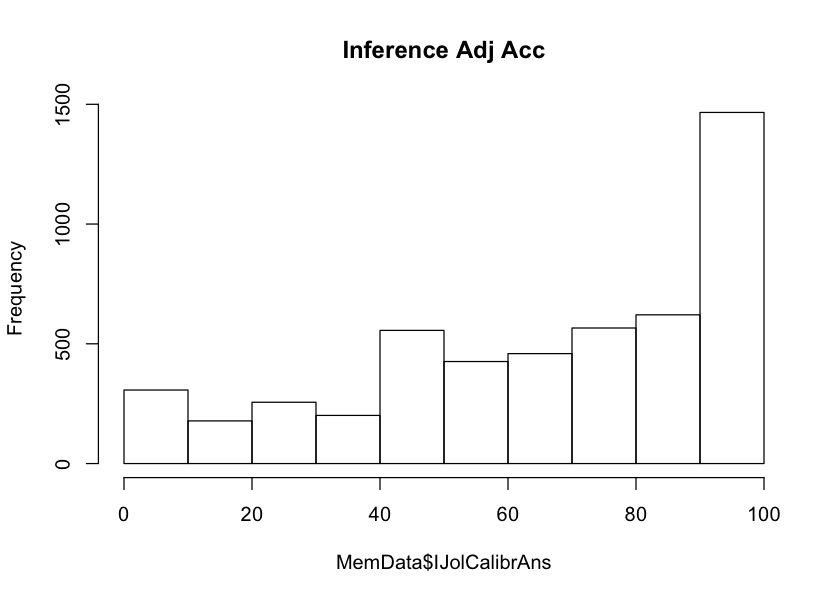

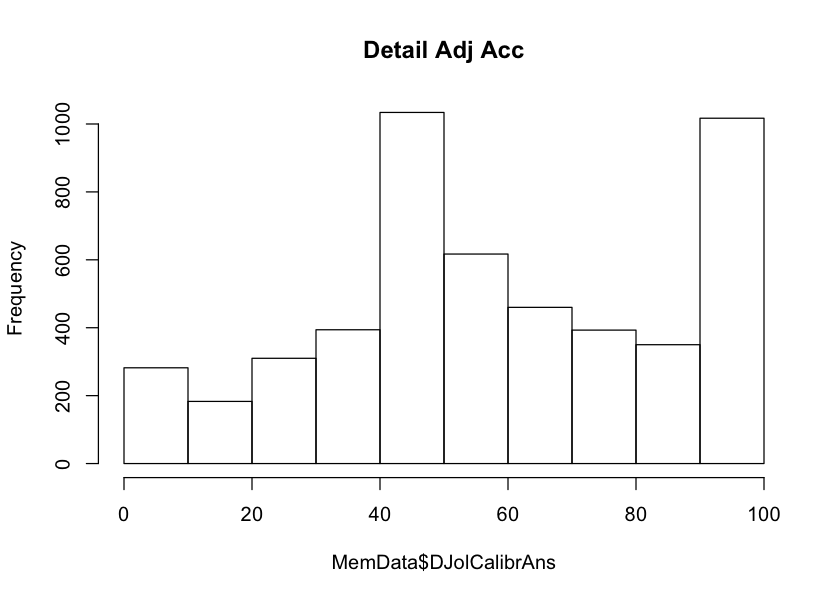

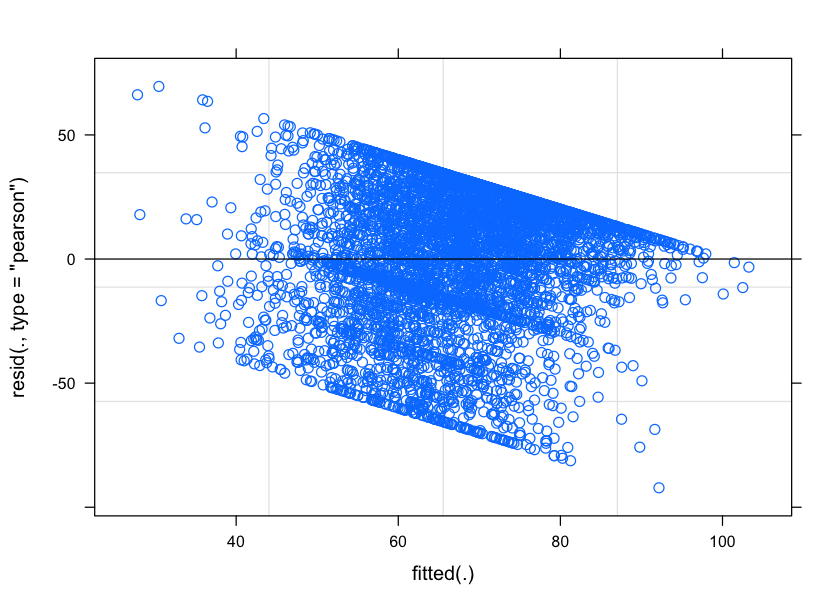

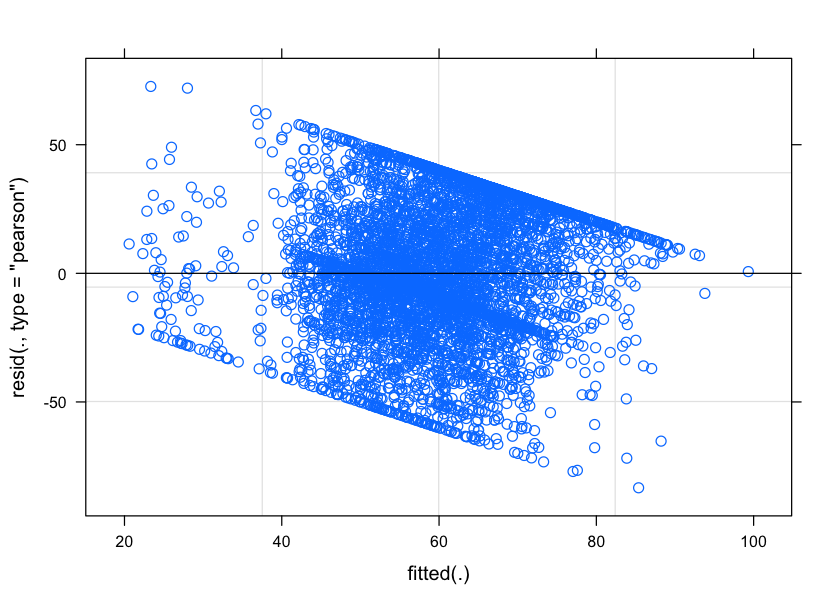

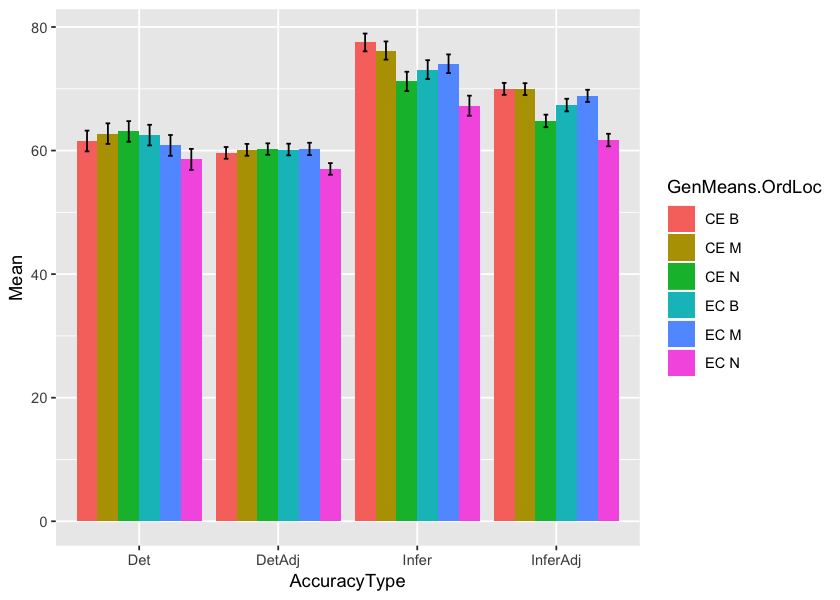

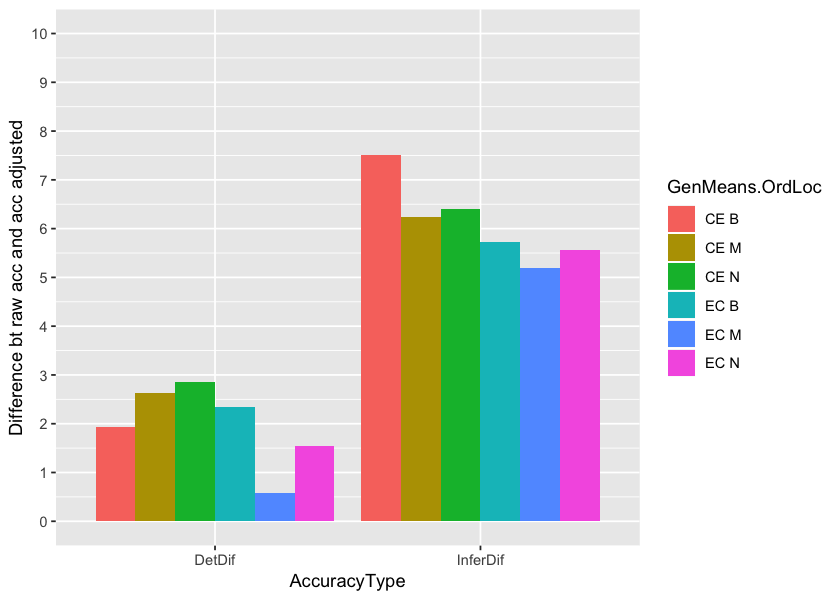

In [28]:
####A model of Adjusted Accuracy####
#The Adjust accuracy score is the participant's confidence in their answer if they're correct and 100 - their confidence if they're incorrect
#Assumption testing
options(repr.plot.width=7, repr.plot.height=5)
hist(MemData$IJolCalibrAns,main="Inference Adj Acc") #not good
hist(MemData$DJolCalibrAns,main="Detail Adj Acc") #a little better
#With bounded data, too much data at the edge of the bounds violates linear regression, beta regression is needed instead
lmer.full <- lmer(IJolCalibrAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum),data=MemData)
plot(lmer.full) #There's a linear relationship among the residuals because the data is bounded
lmer.fullD <- lmer(DJolCalibrAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum),data=MemData)
plot(lmer.fullD) #Same deal.
rm(lmer.full)
rm(lmer.fullD) #removing these as there's no point in moving forward with any analysis on these models
####Do the means suggest that guessing was an issue?####
GenMeans <- MemData %>% group_by(ConnectLoc,OrderofClauses) %>%
  summarise(Infer = mean(InferAns)*100,
            SEInfer = std.error(InferAns)*100,#Mean correct for Inference questions
            Det = mean(DetAns)*100,#Mean correct for Detail questions
            SEDet = std.error(DetAns)*100,
            InferAdj=mean(IJolCalibrAns, na.rm=TRUE), #Mean correct for Inference questions
            SEInferAdj = std.error(IJolCalibrAns),
            DetAdj=mean(DJolCalibrAns),
            SEDetAdj=std.error(DJolCalibrAns),
            InferDif = Infer-InferAdj,
            DetDif = Det-DetAdj) #Mean correct for Detail questions
GenMeans$OrdLoc <- paste(GenMeans$OrderofClauses,GenMeans$ConnectLoc)
GenMeans$OrderofClauses <- NULL
GenMeans$ConnectLoc <- NULL
GenMeans1 <- data.frame(gather(GenMeans[,c("Infer","Det","InferAdj","DetAdj")],AccuracyType,Mean),GenMeans$OrdLoc)
#Means show that the correct accuracy is slightly lower than overall accuracy but does not change the pattern of results
GenMeans2 <- data.frame(gather(GenMeans[,c("SEInfer","SEDet","SEInferAdj","SEDetAdj")],AccuracyType,StdError),GenMeans$OrdLoc)
GenMeans2$AccuracyType <- gsub("SE","",GenMeans2$AccuracyType)
GenMeans3 <- merge(GenMeans1,GenMeans2)
GenMeansDif <- data.frame(gather(GenMeans[,c("InferDif","DetDif")],AccuracyType,Mean),GenMeans$OrdLoc)
ggplot(GenMeans3,aes(AccuracyType,Mean,fill=GenMeans.OrdLoc)) + geom_bar(stat="identity",position="dodge") + 
  geom_errorbar(aes(ymin=GenMeans3$Mean-GenMeans3$StdError,ymax=GenMeans3$Mean+GenMeans3$StdError),width=.2,position=position_dodge(.9))
#At first glance, the adjusted accuracy is lower but doesn't seem to vary by condition - the effect of guessing is evenly spread across conditions
ggplot(GenMeansDif,aes(AccuracyType,Mean,fill=GenMeans.OrdLoc)) + geom_bar(stat="identity",position="dodge") + scale_y_continuous(name="Difference bt raw acc and acc adjusted",breaks= seq(0,10,by=1),limits=c(0,10))

#maybe there is some reason to worry about the effect of guessing being difference across conditions
rm(GenMeans)
rm(GenMeans1)
rm(GenMeans2)
rm(GenMeans3)
rm(GenMeansDif)

# Model 2 - Using Categorical DV for Accuracy

Neither model is better than a model with only random intercepts in terms of predicting the outcome.

[1] "Data is binomial"


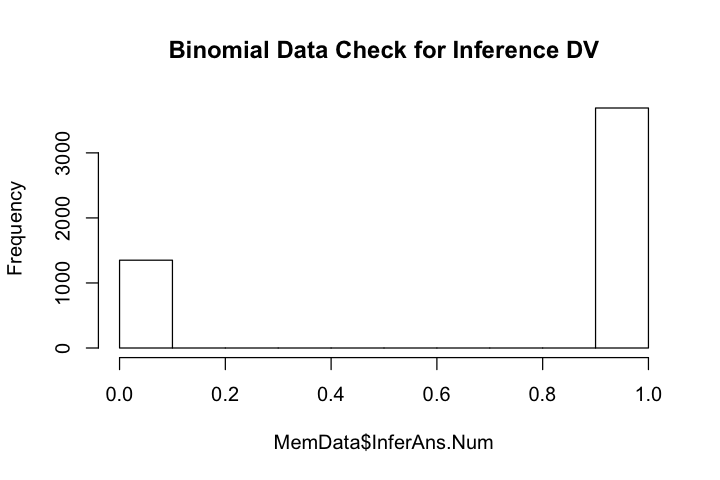

[1] "Data is from a large enough sample. 82 observations are required. We have 5040"


0    1 
1350 3690

0    1 
1938 3102

[1] 0.3658537

[1] 81.98961

[1] "There's no multicolinarity b/c of categorical IVs"


,CE
CE,0.5
EC,-0.5


,Presence,BegLocation
B,0.3333333,0.5
M,0.3333333,-0.5
N,-0.6666667,0.0


[1] "Check Accuracy of full model for inference DV"


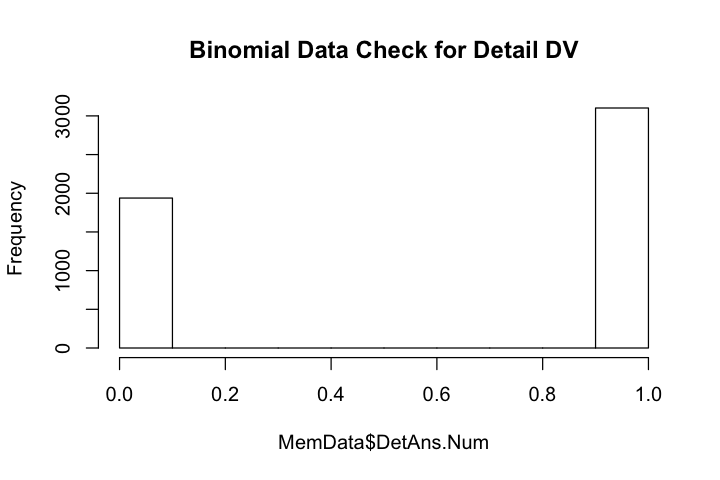

[1] "confusion matrix for full model"


         actual
predicted    0    1
        0  220  127
        1 1130 3563

[1] "accuracy for intercept model when trained and tested on itself"


[1] 0.7505952

[1] "Check accuracy of intercept model for inference DV"


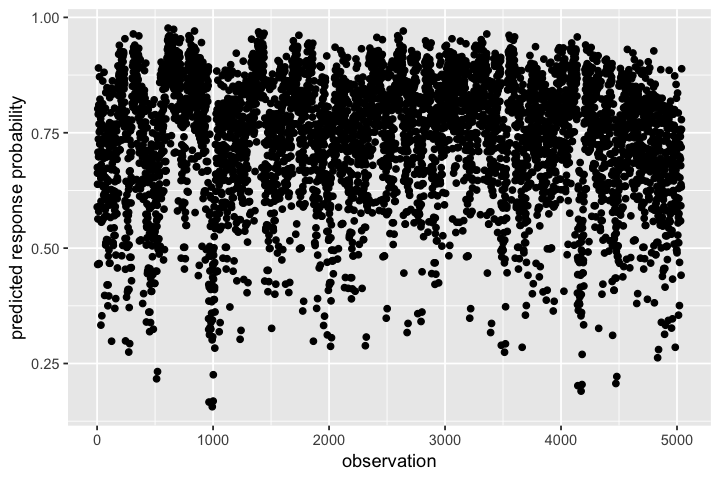

[1] "confusion matrix for intercept model with all data"


         actual
predicted    0    1
        0  194  102
        1 1156 3588

[1] "accuracy for intercept model when trained and tested on itself"


[1] 0.7503968

[1] "Check accuracy of full model for detail DV"


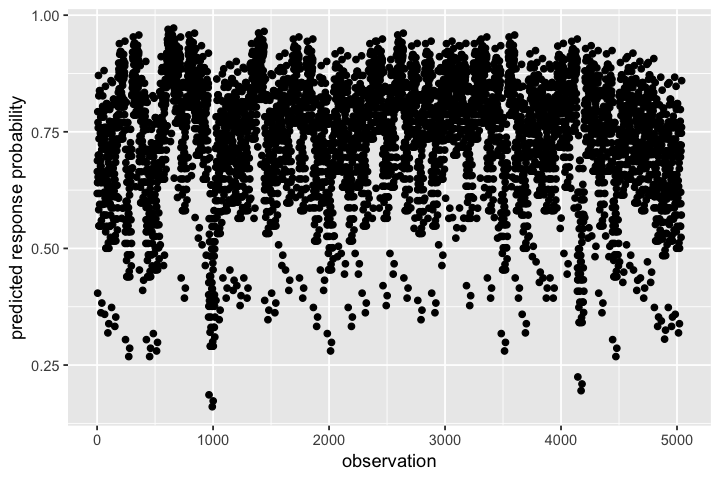

[1] "confusion matrix for full model"


         actual
predicted    0    1
        0  613  369
        1 1325 2733

[1] "accuracy for intercept model when trained and tested on itself"


[1] 0.6638889

[1] "Check accuracy of intercept model for detail DV"


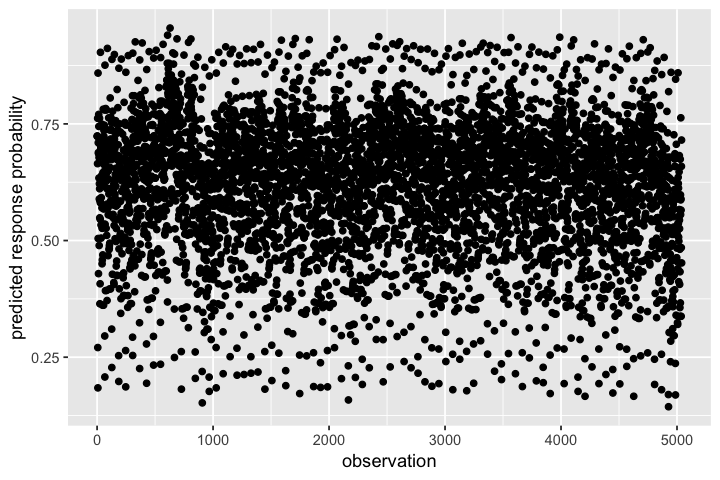

[1] "confusion matrix for intercept model with all data"


         actual
predicted    0    1
        0  612  359
        1 1326 2743

[1] "accuracy for intercept model when trained and tested on itself"


[1] 0.6656746

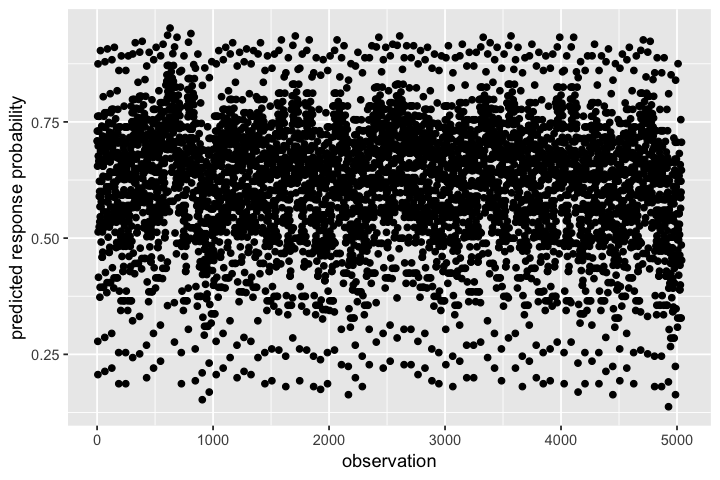

In [35]:
####Model set up for Inference Logistic Mixed Effects Model####
options(repr.plot.width=6, repr.plot.height=4)
#Assumptions
#Repeated measures data warrants mixed effects model as assumption of independence of variables is not met
#1. Binomial
print("Data is binomial")
MemData$InferAns.Num <- as.numeric(ifelse(MemData$InferAns==0,0,1))
hist(MemData$InferAns.Num,main="Binomial Data Check for Inference DV")
MemData$DetAns.Num <- as.numeric(ifelse(MemData$DetAns==0,0,1))
hist(MemData$DetAns.Num,main="Binomial Data Check for Detail DV")
#2. Large Sample
print("Data is from a large enough sample. 82 observations are required. We have 5040")
MemData$InferAns <- as.factor(MemData$InferAns)
MemData$DetAns <- as.factor(MemData$DetAns)
summary(MemData$InferAns)
summary(MemData$DetAns)
1350/3690 #= .3659
(10*3)/.3659 #= 81.9896; actual 5040
#3. No Multicollinearity among IVs (contrasts set intercept to 0. Necessary to avoid dummy coding in order to find
#main effects of Connective Presence and then Location)
print("There's no multicolinarity b/c of categorical IVs")
contrasts(MemData$OrderofClauses) <- c(.5,-.5)
colnames(contrasts(MemData$OrderofClauses)) <- c("CE") #CE for cause-effect
contrasts(MemData$OrderofClauses)
contrasts(MemData$ConnectLoc) <- cbind(c(1/3,1/3,-2/3),c(1/2,-1/2,0))
colnames(contrasts(MemData$ConnectLoc)) <- c("Presence","BegLocation")
contrasts(MemData$ConnectLoc)
#4. Independence of residuals - checked through evaluating model fit
#5. Linearity of independent varialbes and log odds - checked through evaluating model fit

#Inference Model
#Lower AIC with only random intercepts
print("Check Accuracy of full model for inference DV")
glmer.full <- glmer(InferAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum), data=MemData,family=binomial)
glm_prob_df = data.frame(predict(glmer.full,type="response"))
colnames(glm_prob_df) = c('predicted_prob')
glm_prob_df$index = seq(1, nrow(glm_prob_df))
ggplot(glm_prob_df, aes(index,predicted_prob)) + geom_point() + xlab('observation') + ylab('predicted response probability')
threshold = .5
glm_prob_df$predicted_binary = rep("0",nrow(glm_prob_df))
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="1"
confusion_df = data.frame(glm_prob_df$predicted_binary,MemData$InferAns)
colnames(confusion_df) = c('predicted','actual')
print("confusion matrix for full model")
table(confusion_df) #model overpredicts correct responses
print("accuracy for intercept model when trained and tested on itself")
mean(confusion_df$predicted == confusion_df$actual) #.7506, decent accuracy

#again with the intercept only model
print("Check accuracy of intercept model for inference DV")
glmer.int <- glmer(InferAns~1+(1|ID)+(1|QuestNum), data=MemData,family=binomial)
glm_prob_df = data.frame(predict(glmer.int,type="response"))
colnames(glm_prob_df) = c('predicted_prob')
glm_prob_df$index = seq(1, nrow(glm_prob_df))
ggplot(glm_prob_df, aes(index,predicted_prob)) + geom_point() + xlab('observation') + ylab('predicted response probability')
glm_prob_df$predicted_binary = rep("0",nrow(glm_prob_df))
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="1"
confusion_df = data.frame(glm_prob_df$predicted_binary,MemData$InferAns)
colnames(confusion_df) = c('predicted','actual')
print("confusion matrix for intercept model with all data")
table(confusion_df) #model overpredicts correct responses
print("accuracy for intercept model when trained and tested on itself")
mean(confusion_df$predicted == confusion_df$actual) #.7504, barely smaller accuracy

print("Check accuracy of full model for detail DV")
#Lower AIC with only random intercepts
glmer.full <- glmer(DetAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum), data=MemData,family=binomial)
glm_prob_df = data.frame(predict(glmer.full,type="response"))
colnames(glm_prob_df) = c('predicted_prob')
glm_prob_df$index = seq(1, nrow(glm_prob_df))
ggplot(glm_prob_df, aes(index,predicted_prob)) + geom_point() + xlab('observation') + ylab('predicted response probability')
glm_prob_df$predicted_binary = rep("0",nrow(glm_prob_df))
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="1"
confusion_df = data.frame(glm_prob_df$predicted_binary,MemData$DetAns)
colnames(confusion_df) = c('predicted','actual')
print("confusion matrix for full model")
table(confusion_df) #model overpredicts correct responses
print("accuracy for intercept model when trained and tested on itself")
mean(confusion_df$predicted == confusion_df$actual) #.7506, decent accuracy

#again with the intercept only model
print("Check accuracy of intercept model for detail DV")
glmer.int <- glmer(DetAns~1+(1|ID)+(1|QuestNum), data=MemData,family=binomial)
glm_prob_df = data.frame(predict(glmer.int,type="response"))
colnames(glm_prob_df) = c('predicted_prob')
glm_prob_df$index = seq(1, nrow(glm_prob_df))
ggplot(glm_prob_df, aes(index,predicted_prob)) + geom_point() + xlab('observation') + ylab('predicted response probability')
glm_prob_df$predicted_binary = rep("0",nrow(glm_prob_df))
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="1"
confusion_df = data.frame(glm_prob_df$predicted_binary,MemData$DetAns)
colnames(confusion_df) = c('predicted','actual')
print("confusion matrix for intercept model with all data")
table(confusion_df) #model overpredicts correct responses
print("accuracy for intercept model when trained and tested on itself")
mean(confusion_df$predicted == confusion_df$actual) #.7504, barely smaller accuracy
#Most of the effects can be explained by the random effects. This model isn't good for prediction
rm(glm_prob_df)
rm(confusion_df)
rm(glmer.int)

# K-fold Cross-Validation of both models

kfold for 1 question (84 observations) + 1 full participant (60 observations) - 1 question for overlap: 143 obs per test set over 8580 iterations
The average accuracy for all test sets is is near the accuracy for the model when tested on itself

In [79]:
#Warning this takes a long long time to run
print("K-Fold for Inference DV")
PTOT = as.data.frame(x=NA)
colnames(PTOT) <- "x"

for (j in c(1:60))
  for (i in c(1:8,10:85))
  {
    ##Data that will be predicted
    Test=MemData[MemData$ID==i|MemData$QuestNum==j,c(1,2,5,9,10)]
    ###To train the model
    Train=MemData[MemData$ID!=i&MemData$QuestNum!=j,c(1,2,5,9,10)]
    M1 <- glmer(InferAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum), data=Train,family=binomial)
    P1=as.data.frame(predict(M1, Test,type="response",allow.new.levels = TRUE))
    colnames(P1) <- "predicted_prob"
    P1$predicted_binary = rep("0",nrow(Test))
    P1$predicted_binary[P1$predicted_prob>threshold]="1"
    confusion_df = data.frame(P1$predicted_binary,Test$InferAns)
    colnames(confusion_df) = c('predicted','actual')
    Acc <- mean(confusion_df$predicted == confusion_df$actual)
    PTOT = rbind(PTOT,Acc)
  }
AvgAcc <- mean(PTOT$x,na.rm=TRUE)
print("This is the average accuracy of the Inference model")
AvgAcc
SEAvgAcc <- std.error(PTOT$x,na.rm=TRUE)
print("This is the standard error of the above accuracy")
SEAvgAcc
#The model is as accurate on average for test sets as it is on the data in trained on


[1] "K-Fold for Inference DV"
[1] "This is the average accuracy of the Inference model"


[1] 0.7337121

[1] "This is the standard error of the above accuracy"


[1] 0.001141506

In [80]:
#Warning this takes a long long time to run
print("Now K-Fold for Detail DV")
PTOTD= as.data.frame(x=NA)
colnames(PTOTD) <- "x"

for (j in c(1:60))
  for (i in c(1:8,10:85))
  {
    ##Data that will be predicted
    Test=MemData[MemData$ID==i|MemData$QuestNum==j,c(1,5,6,9,10)]
    ###To train the model
    Train=MemData[MemData$ID!=i&MemData$QuestNum!=j,c(1,5,6,9,10)]
    M1 <- glmer(DetAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum), data=Train,family=binomial)
    P1=as.data.frame(predict(M1, Test,type="response",allow.new.levels = TRUE))
    colnames(P1) <- "predicted_prob"
    P1$predicted_binary = rep("0",nrow(Test))
    P1$predicted_binary[P1$predicted_prob>threshold]="1"
    confusion_df = data.frame(P1$predicted_binary,Test$DetAns)
    colnames(confusion_df) = c('predicted','actual')
    Acc <- mean(confusion_df$predicted == confusion_df$actual)
    PTOTD = rbind(PTOTD,Acc)
  }
AvgAcc <- mean(PTOTD$x,na.rm=TRUE)
print("This is the average accuracy of the Detail model")
AvgAcc
SEAvgAcc <- std.error(PTOTD$x,na.rm=TRUE)
print("This is the standard error of the above accuracy")
SEAvgAcc


[1] "Now K-Fold for Detail DV"
[1] "This is the average accuracy of the Detail model"


[1] 0.6298216

[1] "This is the standard error of the above accuracy"


[1] 0.001306511

# Making inferences from the model and Bayes Factors

The models weren't predictive, but we may still be able to draw inferences from them about the variables in question.

## Inference Model

### Look at the inference model

In [54]:
####Look at the model####
options(width = 400)

#Prediction isn't great, but there are some inferences to be made
contrasts(MemData$OrderofClauses) <- c(.5,-.5)
colnames(contrasts(MemData$OrderofClauses)) <- c("CE") #CE for cause-effect
contrasts(MemData$OrderofClauses)
contrasts(MemData$ConnectLoc) <- cbind(c(1/3,1/3,-2/3),c(1/2,-1/2,0))
colnames(contrasts(MemData$ConnectLoc)) <- c("Presence","BegLocation")
contrasts(MemData$ConnectLoc)
glmer.full <- glmer(InferAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum), data=MemData,family=binomial)
summary(glmer.full)


,CE
CE,0.5
EC,-0.5


,Presence,BegLocation
B,0.3333333,0.5
M,0.3333333,-0.5
N,-0.6666667,0.0


Generalized linear mixed model fit by maximum likelihood (Laplace Approximation) ['glmerMod']
 Family: binomial  ( logit )
Formula: InferAns ~ OrderofClauses * ConnectLoc + (1 | ID) + (1 | QuestNum)
   Data: MemData

     AIC      BIC   logLik deviance df.resid 
  5506.7   5558.9  -2745.3   5490.7     5032 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9747 -0.8160  0.4375  0.6028  2.2210 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.3394   0.5826  
 QuestNum (Intercept) 0.3652   0.6043  
Number of obs: 5040, groups:  ID, 84; QuestNum, 60

Fixed effects:
                                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)                             1.158189   0.106981  10.826  < 2e-16 ***
OrderofClausesCE                        0.201944   0.067529   2.990  0.00279 ** 
ConnectLocPresence                      0.337047   0.070236   4.799  1.6e-06 ***
ConnectLocBegLocation                   0.011700   0.084300  

### some back end long output for bayes factors

In [56]:
#Betas and CIs
Labels <- c("CE vs EC","Connect Present","Connect Begin","Connect Present x Order","Connect Begin x Order")
Beta <- c(exp(.2019),exp(.337),exp(.0117),exp(-.01),exp(.1432))
CI1 <- c(exp(.2019-1.96*.0675),exp(.337-1.96*.0702),exp(.0117-1.96*.00843),exp(-.01-1.96*.1403),exp(.1432-1.96*.1686))
CI2 <- c(exp(.2019+1.96*.0675),exp(.337+1.96*.0702),exp(.0117+1.96*.00843),exp(-.01+1.96*.1403),exp(.1432+1.96*.1686))
p <- c(.0027,.0000,.8896,.9436,.3959)
####Bayes Factors####
print("Get the Bayes Factors")
MemData$InferAns.Num <- as.numeric(ifelse(MemData$InferAns==0,0,1)) #brm requires numeri
full_BF = brm(InferAns.Num~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum),data=MemData,family=bernoulli,save_all_pars = TRUE)
Null_BF = update(full_BF,formula = ~.-OrderofClauses*ConnectLoc)
NoInt_BF = update(full_BF,formula = ~.-OrderofClauses:ConnectLoc)
NoOrd_BF = brm(InferAns.Num~ConnectLoc+(1|ID)+(1|QuestNum),data=MemData,family=bernoulli,save_all_pars = TRUE)
NoConn_BF = brm(InferAns.Num~OrderofClauses+(1|ID)+(1|QuestNum),data=MemData,family=bernoulli,save_all_pars = TRUE)

####Create a dataframe to present all of this####
BF.Null = bayes_factor(full_BF,Null_BF) 
BF.Null #H1 is more likely than H0
BF.Null <- 10825.27737
BF.NoInt = bayes_factor(full_BF,NoInt_BF) 
BF.NoInt #H without the interaction is more likely than with it
BF.NoInt <- .29534
BF.NoOrd = bayes_factor(full_BF,NoOrd_BF) 
BF.NoOrd #H with OrderofClauses included is more likely than without it
BF.NoOrd <- 4.42229
Null.NoOrd = bayes_factor(NoOrd_BF,Null_BF) 
Null.NoOrd #H with OrderofClauses is more likely than null
Null.NoOrd <- 2549.47339
BF.NoConn = bayes_factor(full_BF,NoConn_BF) 
BF.NoConn #H1 is more liekly than H0
BF.NoConn <- 909.31022


[1] "Get the Bayes Factors"


Compiling the C++ model
Start sampling



SAMPLING FOR MODEL '8721cd6ec285ca0c38fdf08145f4881e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.001314 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 13.14 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 18.5928 seconds (Warm-up)
Chain 1:                10.6971 seconds (Sampling)


The desired updates require recompiling the model
Compiling the C++ model
Start sampling



SAMPLING FOR MODEL '93e44abf96022850a9b39d1423fff68d' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000778 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 7.78 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 12.9766 seconds (Warm-up)
Chain 1:                7.99938 seconds (Sampling)
C

Start sampling



SAMPLING FOR MODEL '8721cd6ec285ca0c38fdf08145f4881e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000769 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 7.69 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 17.2332 seconds (Warm-up)
Chain 1:                9.46609 seconds (Sampling)
C

Compiling the C++ model
recompiling to avoid crashing R session
Start sampling



SAMPLING FOR MODEL '8721cd6ec285ca0c38fdf08145f4881e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.001219 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 12.19 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 14.7405 seconds (Warm-up)
Chain 1:                9.09282 seconds (Sampling)


Compiling the C++ model
recompiling to avoid crashing R session
Start sampling



SAMPLING FOR MODEL '8721cd6ec285ca0c38fdf08145f4881e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.001158 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 11.58 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 16.9734 seconds (Warm-up)
Chain 1:                8.87603 seconds (Sampling)


Estimated Bayes factor in favor of bridge1 over bridge2: 10825.27737

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8


Estimated Bayes factor in favor of bridge1 over bridge2: 0.29534

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10


Estimated Bayes factor in favor of bridge1 over bridge2: 4.42229

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


Estimated Bayes factor in favor of bridge1 over bridge2: 2549.47339

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10


Estimated Bayes factor in favor of bridge1 over bridge2: 909.31022

ERROR: Error in rbind(deparse.level, ...): numbers of columns of arguments do not match


### Results table with Bayes Factors, p-values, and CIs

In [81]:
####Create a dataframe to present all of this####

BF.Null <- 10825.27737
BF.NoInt <- .29534
BF.NoOrd <- 4.42229
Null.NoOrd <- 2549.47339
BF.NoConn <- 909.31022
Bayes <- c(BF.NoOrd,BF.NoConn,BF.NoConn,BF.NoInt,BF.NoInt)
BayesNull <- c(Null.NoOrd,NA,NA,NA,NA)

Descriptive <- c("We can accept that the odds of a correct answer are higher when the passage is easier to read (CE) after accounting for random effects",
                 "We can accept that the odds of a correct answer are higher when the passage is easier to read (Connective Present) after accounting for random effects",
                 "The CI includes 1 which means that the odds could go in either direction, the p value is also > .05. However, we cannot confirm H0 because the Bayes factor was not retrieved for this level of the factor",
                 "We can accept the H0 that there are no interaction effects",
                 "We can accept the H0 that there are no interaction effects")
Null <- data.frame("Full-Null",NA,NA,NA,NA,NA,BF.Null,"We can accept H1 that the full model is better than one with only random intercepts")
colnames(Null) <- c("Labels","Beta","CI1","CI2","p","Bayes","BayesNull","Descriptive")

BetaDF <- data.frame(Labels,Beta,CI1,CI2,p,Bayes,BayesNull,Descriptive)
BetaDF <- rbind(BetaDF,Null)
BetaDF


Labels,Beta,CI1,CI2,p,Bayes,BayesNull,Descriptive
CE vs EC,1.0892616,0.9665135,1.227599,0.161,4.42229,2549.473,We can accept that the odds of a correct answer are higher when the passage is easier to read (CE) after accounting for random effects
Connect Present,1.0502204,0.9253197,1.191980,0.448,909.31022,NA,We can accept that the odds of a correct answer are higher when the passage is easier to read (Connective Present) after accounting for random effects
Connect Begin,1.0108585,0.8730102,1.170473,0.886,909.31022,NA,"The CI includes 1 which means that the odds could go in either direction, the p value is also > .05. However, we cannot confirm H0 because the Bayes factor was not retrieved for this level of the factor"
Connect Present x Order,0.8274555,0.6423435,1.065913,0.143,0.29534,NA,We can accept the H0 that there are no interaction effects
Connect Begin x Order,0.8732792,0.6513449,1.170834,0.365,0.29534,NA,We can accept the H0 that there are no interaction effects
Full-Null,NA,NA,NA,NA,NA,10825.277,We can accept H1 that the full model is better than one with only random intercepts


## Detail Model

### Look at the detail model output

In [63]:
####Look at the model####
options(width = 400)

#Prediction isn't great, but there are some inferences to be made
glmer.fullD <- glmer(DetAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum), data=MemData,family=binomial)
summary(glmer.fullD)


Generalized linear mixed model fit by maximum likelihood (Laplace Approximation) ['glmerMod']
 Family: binomial  ( logit )
Formula: DetAns ~ OrderofClauses * ConnectLoc + (1 | ID) + (1 | QuestNum)
   Data: MemData

     AIC      BIC   logLik deviance df.resid 
  6392.0   6444.2  -3188.0   6376.0     5032 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8532 -1.0272  0.5613  0.7515  2.1584 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.09296  0.3049  
 QuestNum (Intercept) 0.44483  0.6670  
Number of obs: 5040, groups:  ID, 84; QuestNum, 60

Fixed effects:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                             0.52369    0.09743   5.375 7.65e-08 ***
OrderofClausesCE                        0.08551    0.06100   1.402    0.161    
ConnectLocPresence                      0.04901    0.06462   0.758    0.448    
ConnectLocBegLocation                   0.01075    0.07481   0.144 

### some back end long output for bayes factors

In [64]:

####Bayes Factors####
print("Get the Bayes Factors")
MemData$DetAns.Num <- as.numeric(ifelse(MemData$DetAns==0,0,1)) #brm requires numeri
full_BF = brm(DetAns.Num~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum),data=MemData,family=bernoulli,save_all_pars = TRUE)
Null_BF = update(full_BF,formula = ~.-OrderofClauses*ConnectLoc)
NoInt_BF = update(full_BF,formula = ~.-OrderofClauses:ConnectLoc)
NoOrd_BF = brm(DetAns.Num~ConnectLoc+(1|ID)+(1|QuestNum),data=MemData,family=bernoulli,save_all_pars = TRUE)
NoConn_BF = brm(DetAns.Num~OrderofClauses+(1|ID)+(1|QuestNum),data=MemData,family=bernoulli,save_all_pars = TRUE)

####Create a dataframe to present all of this####
BF.Null = bayes_factor(full_BF,Null_BF) 
BF.Null 
BF.NoInt = bayes_factor(full_BF,NoInt_BF) 
BF.NoInt 
BF.NoOrd = bayes_factor(full_BF,NoOrd_BF) 
BF.NoOrd 
Null.NoOrd = bayes_factor(NoOrd_BF,Null_BF) 
Null.NoOrd 
BF.NoConn = bayes_factor(full_BF,NoConn_BF) 
BF.NoConn


[1] "Get the Bayes Factors"


Compiling the C++ model
recompiling to avoid crashing R session
Start sampling



SAMPLING FOR MODEL '8721cd6ec285ca0c38fdf08145f4881e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.001437 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 14.37 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 19.8985 seconds (Warm-up)
Chain 1:                9.78883 seconds (Sampling)


The desired updates require recompiling the model
Compiling the C++ model
recompiling to avoid crashing R session
Start sampling



SAMPLING FOR MODEL '93e44abf96022850a9b39d1423fff68d' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.001065 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 10.65 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 12.4778 seconds (Warm-up)
Chain 1:                6.75386 seconds (Sampling)


Start sampling



SAMPLING FOR MODEL '8721cd6ec285ca0c38fdf08145f4881e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000731 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 7.31 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 18.4801 seconds (Warm-up)
Chain 1:                9.32187 seconds (Sampling)
C

Compiling the C++ model
recompiling to avoid crashing R session
Start sampling



SAMPLING FOR MODEL '8721cd6ec285ca0c38fdf08145f4881e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.00109 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 10.9 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 17.061 seconds (Warm-up)
Chain 1:                9.27167 seconds (Sampling)
Cha

Compiling the C++ model
recompiling to avoid crashing R session
Start sampling



SAMPLING FOR MODEL '8721cd6ec285ca0c38fdf08145f4881e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.001058 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 10.58 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 18.6931 seconds (Warm-up)
Chain 1:                9.07687 seconds (Sampling)


Estimated Bayes factor in favor of bridge1 over bridge2: 0.00827

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7


Estimated Bayes factor in favor of bridge1 over bridge2: 0.51409

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8


Estimated Bayes factor in favor of bridge1 over bridge2: 0.23866

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


Estimated Bayes factor in favor of bridge1 over bridge2: 0.03008

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


Estimated Bayes factor in favor of bridge1 over bridge2: 0.02631

In [67]:
####Create a dataframe to present all of this####
#Betas and CIs
Labels <- c("CE vs EC","Connect Present","Connect Begin","Connect Present x Order","Connect Begin x Order")
Beta <- c(exp(.0855),exp(.049),exp(.0108),exp(-.1894),exp(-.1355))
CI1 <- c(exp(.0855-1.96*.061),exp(.049-1.96*.0646),exp(.0108-1.96*.0748),exp(-.1894-1.96*.1292),exp(-.1355-1.96*.1496))
CI2 <- c(exp(.0855+1.96*.061),exp(.049+1.96*.0646),exp(.0108+1.96*.0748),exp(-.1894+1.96*.1292),exp(-.1355+1.96*.1496))
p <- c(.161,.448,.886,.143,.365)
BF.Null <- .0082
BF.NoInt <- .514
BF.NoOrd <- .2386
Null.NoOrd <- .0301
BF.NoConn <- .0263
Bayes <- c(BF.NoOrd,BF.NoConn,BF.NoConn,BF.NoInt,BF.NoInt)
BayesNull <- c(Null.NoOrd,NA,NA,NA,NA)

Descriptive <- c("We have little evidence either way compared to a model without Order, but when compared to the null, we can accept H0",
                 "We can accept H0",
                 "We can accept H0",
                 "We have little to no evidence either way",
                 "We have little to no evidence either way")
Null <- data.frame("Full-Null",NA,NA,NA,NA,NA,BF.Null,"We can accept H0 that the intercept model is better than full model")
colnames(Null) <- c("Labels","Beta","CI1","CI2","p","Bayes","BayesNull","Descriptive")

BetaDF <- data.frame(Labels,Beta,CI1,CI2,p,Bayes,BayesNull,Descriptive)
BetaDF <- rbind(BetaDF,Null)
BetaDF

Labels,Beta,CI1,CI2,p,Bayes,BayesNull,Descriptive
CE vs EC,1.0892616,0.9665135,1.227599,0.161,0.2386,0.0301,"We have little evidence either way compared to a model without Order, but when compared to the null, we can accept H0"
Connect Present,1.0502204,0.9253197,1.191980,0.448,0.0263,NA,We can accept H0
Connect Begin,1.0108585,0.8730102,1.170473,0.886,0.0263,NA,We can accept H0
Connect Present x Order,0.8274555,0.6423435,1.065913,0.143,0.5140,NA,We have little to no evidence either way
Connect Begin x Order,0.8732792,0.6513449,1.170834,0.365,0.5140,NA,We have little to no evidence either way
Full-Null,NA,NA,NA,NA,NA,0.0082,We can accept H0 that the intercept model is better than full model


# A check against effects of guessing

We will eventually look at beta regression as a full check against guessing, but for now, running the same models on a limited data set, that does not include any items with 60% confidence or below is used. We find that these models are very similar to the ones made using the full data set.

In [71]:
ConfidentDataI <- MemData[MemData$InferJOL>60,c(1:2,5,9:10)]
ConfidentDataD <- MemData[MemData$DetJOL>60,c(1,5:6,9:11)]
contrasts(ConfidentDataD$OrderofClauses) <- c(.5,-.5)
contrasts(ConfidentDataD$ConnectLoc) <- cbind(c(1/3,1/3,-2/3),c(.5,-.5,0))
guess_glmerI <- glmer(InferAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum),data=ConfidentDataI,family=binomial)
summary(guess_glmerI)
guess_glmerD <- glmer(DetAns~OrderofClauses*ConnectLoc+(1|ID)+(1|QuestNum),data=ConfidentDataD,family=binomial)
summary(guess_glmerD)


Generalized linear mixed model fit by maximum likelihood (Laplace Approximation) ['glmerMod']
 Family: binomial  ( logit )
Formula: InferAns ~ OrderofClauses * ConnectLoc + (1 | ID) + (1 | QuestNum)
   Data: ConfidentDataI

     AIC      BIC   logLik deviance df.resid 
  3923.9   3974.2  -1953.9   3907.9     3996 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8036  0.2114  0.3745  0.5312  2.5980 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.4885   0.6990  
 QuestNum (Intercept) 0.4568   0.6759  
Number of obs: 4004, groups:  ID, 84; QuestNum, 60

Fixed effects:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                             1.47789    0.12492  11.830  < 2e-16 ***
OrderofClausesCE                        0.22127    0.08184   2.704  0.00686 ** 
ConnectLocPresence                      0.48396    0.08450   5.727 1.02e-08 ***
ConnectLocBegLocation                  -0.16594    0.10298

Generalized linear mixed model fit by maximum likelihood (Laplace Approximation) ['glmerMod']
 Family: binomial  ( logit )
Formula: DetAns ~ OrderofClauses * ConnectLoc + (1 | ID) + (1 | QuestNum)
   Data: ConfidentDataD

     AIC      BIC   logLik deviance df.resid 
  3840.2   3889.0  -1912.1   3824.2     3294 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3932 -0.8869  0.4523  0.6469  2.9422 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.2541   0.5041  
 QuestNum (Intercept) 0.6831   0.8265  
Number of obs: 3302, groups:  ID, 84; QuestNum, 60

Fixed effects:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  0.86584    0.12842   6.743 1.56e-11 ***
OrderofClauses1              0.07047    0.08107   0.869    0.385    
ConnectLoc1                  0.07067    0.08611   0.821    0.412    
ConnectLoc2                  0.01379    0.09892   0.139    0.889    
OrderofClauses1:ConnectLoc1 -0.1680

# Final Plots

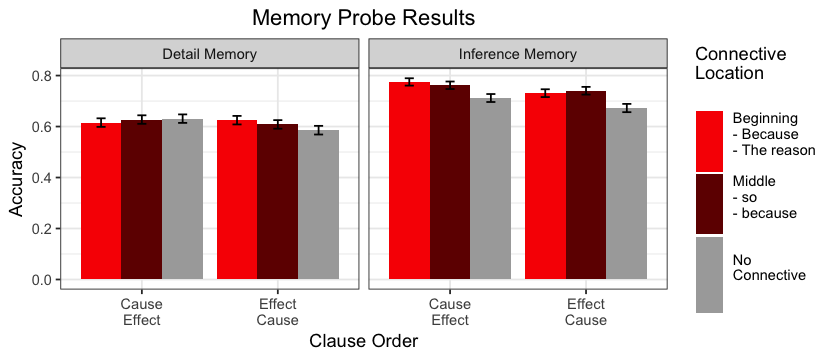

In [77]:
MbyOrdLoc <- MemData %>%
  group_by(OrderofClauses, ConnectLoc) %>%
  summarise(IAccM = mean(InferAns.Num),
    IAccSE = std.error(InferAns.Num),
    DAccM = mean(DetAns.Num),
    DAccSE = std.error(DetAns.Num)
  )
MbyOrdLoc1 <- gather(MbyOrdLoc[,c("ConnectLoc","OrderofClauses","IAccM","DAccM")],AccType,Mean,-OrderofClauses,-ConnectLoc)
MbyOrdLoc2 <- gather(MbyOrdLoc[,c("ConnectLoc","OrderofClauses","IAccSE","DAccSE")],AccType,StdErr,-OrderofClauses,-ConnectLoc)
MbyOrdLoc2$AccType <- gsub("SE","M",MbyOrdLoc2$AccType)
MbyOrdLoc3 <- merge(MbyOrdLoc1,MbyOrdLoc2)
labelsAcc <- c(DAccM = "Detail Memory", IAccM = "Inference Memory")
ggplot(MbyOrdLoc3,aes(OrderofClauses,Mean,fill=factor(ConnectLoc,labels = c("Beginning\n- Because\n- The reason\n", "Middle\n- so\n- because\n","\nNo\nConnective\n\n")))) + 
  facet_grid(. ~ AccType, labeller=labeller(AccType=labelsAcc))+theme(strip.background=element_rect(fill="#F5F5F5")) + 
  geom_bar(stat="identity",position="dodge") +
  geom_errorbar(aes(ymin=Mean-StdErr,ymax=Mean+StdErr),width=.2,position=position_dodge(.9)) +
  labs(title="Memory Probe Results",x="Clause Order", y="Accuracy",
       fill="Connective\nLocation\n")+scale_fill_manual(values=c("#F80000", "#700000", "#A9A9A9"))+
  scale_x_discrete(labels=c("Cause\nEffect","Effect\nCause"))+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

# Discussion

We found a main effect of connective presence and clause order such that both conditions improved retention of an accurate inference. The variables did not interact and based on the Bayes Factor we can take this non-interaction as evidence for the null (i.e., connective presence does not interact with difficulty (i.e., the temporal order of the clauses). This result suggests that the McNamara et al. (1996) finding that participants with greater domain knowledge were harmed by the presence of a connective was not due to the text being easier to process. The original study had only 56 participants, divided across 4 conditions with each participants, and was a between subjects study. This may have substantially lowered the power of the study. Additionally, the participants were middle-school students. The reading processes of younger students may be fundementally different from that of college students. For example, it may be that younger readers are engageing in less active reading unless it is required for coherence. If this were the case, then it may be that college students benefit from the presence of a connective even when text is easy to process because they are engaged in more global inferences to connect new knowledge to previous knowledge. However, younger readers may not search make such elaborative inferences and as such they may only benefit when forced to make a local inference in order to maintain coherence within the text. This could account for the discrepant findings. 

The Bayes Factors for detail memory support a conclusion that their is no main effect of clause order or connective presence on memory for details. However, their is not enough evidence to make a conclusion either way for their interactions. In fact, the means indicate that memory for details declined more in the no connective, effect-cause condition than in the connective present conditions. Given that accuracy and confidence was generally lower for detail memory, guessing was likely higher. Use of the confidence adjusted accuracy scores might be more sensitive to smaller effects. As this dependent variable does not meet the assumptions for linear regression, beta regression will be applied in the future. Originally, it was speculated that their would be a trade off between memory for details and memory for inferences as directing attention to the inference would result in less processing of detail that was not relevant to the inference. However, the details may be also improving from the presence of a connective when the sentence is particularly difficult. This would indicate that the connective's present is helping the reader construct a more complete situation model of the text (i.e., the reader is finding a way to connect all the details together to form one memory structure that includes an integration of inference and details rather than storing them as separate elements). Demonstrating either the null or an alternative hypothesis then is important for understanding how connectives improve memory for inferences.

# Conclusion

The findings as they stand indicate that causal connectives help adult readers integrate information across clauses to form an accurate and memorable understanding of relationships among the clauses in a text. The findings also further prior findings that cause-effect clauses are easier to integrate than effect-cause clauses (Black & Bern, 1981; Irwin, 1980) by demonstrating that cause-effect clause orders are also more memorable. While college readers are certainly capable of forming a relationship across clauses, the results here suggest that without connectives to act as processing constructions they either don't attempt integration or they combine clauses in a manner inconsistent with the context of the passage. If they were not attempting to integrate clauses, we might expect to see no order of clauses effect in no connective conditions; however, this is not the case. The presence of both main effects lends support to an interpretation that the readers are attempting to integrate the clauses but do so incorrectly. Connectives then are protective against misinterpretation. This finding has potential practical applications for writers, but it also has theoretical implications. Low level readers who are proficient decoders but still misread texts may be less adept at using discourse cues such as cohesion or may require more cohesive texts. Further research should investigate the effect of connective presence within this group.

# References

Black, J. B., & Bern, H. (1981). Causal coherence and memory for events in narratives. Journal of Verbal Learning and Verbal Behavior, 20(3), 267-275.

Irwin, J. W. (1980). The Effects of Explicitness and Clause Order on the Comprehension of Reversible Causal Relationships. Reading Research Quarterly, 15(4), 477-88.

McNamara, D. S., Kintsch, E., Songer, N. B., & Kintsch, W. (1996). Are good texts always better? Interactions of text coherence, background knowledge, and levels of understanding in learning from text. Cognition and instruction, 14(1), 1-43.